In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17: Correlation ##

In [117]:
def r_scatter(r, size= 1000):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, size)
    z = np.random.normal(0, 1, size)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

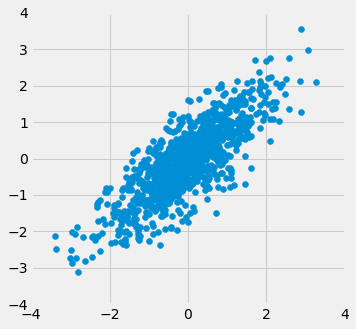

In [118]:
r_scatter(.8)

In [95]:
hybrid = Table.read_table('hybrid.csv')

In [96]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


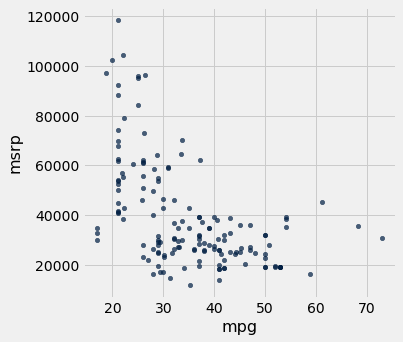

In [97]:
hybrid.scatter('mpg', 'msrp')

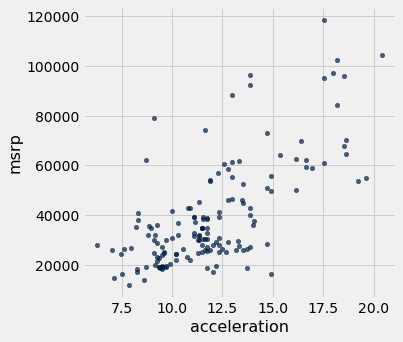

In [98]:
hybrid.scatter('acceleration', 'msrp')

In [99]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

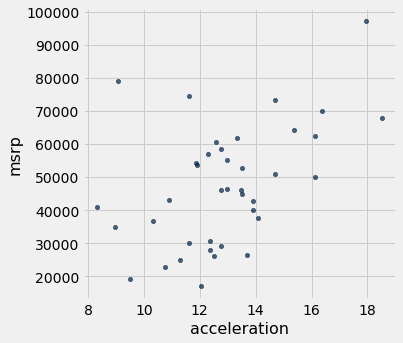

In [100]:
suv.scatter('acceleration', 'msrp')

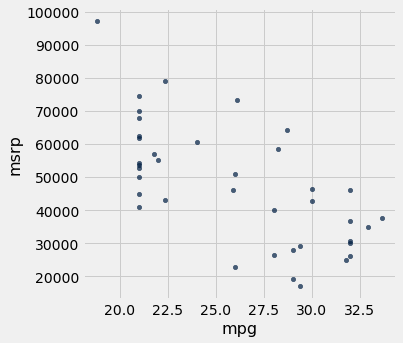

In [88]:
suv.scatter('mpg', 'msrp')

In [103]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x)  

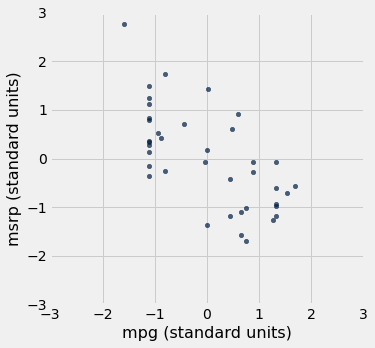

In [140]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

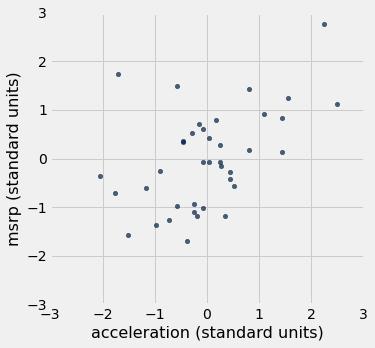

In [108]:
suv_table = Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

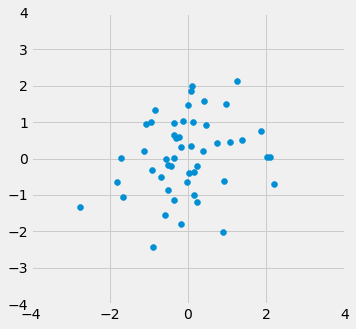

In [168]:
r_scatter(0,50)

In [107]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


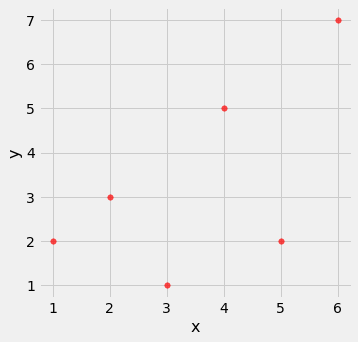

In [29]:
t.scatter(0, 1, s=30, color='red')

In [157]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [158]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [32]:
# r is the average of the products of standard units

r = np.mean(t_product.column(4))



r

0.6174163971897709

In [159]:
def correlation(t, label_x, label_y):
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [160]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

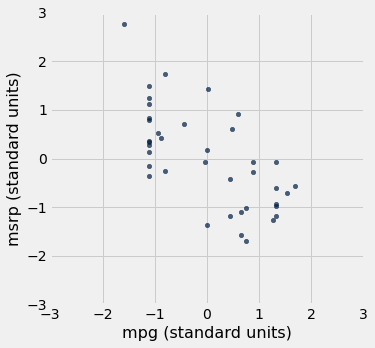

In [161]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [162]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

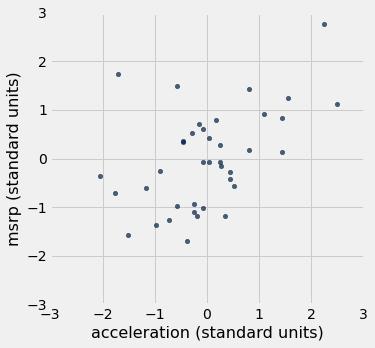

In [163]:
suv_table = Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [164]:
correlation(t, 'x', 'y')

0.6174163971897709

In [165]:
correlation(t, 'y', 'x')

0.6174163971897709

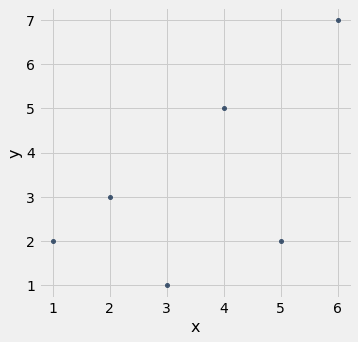

In [166]:
t.scatter('x', 'y')

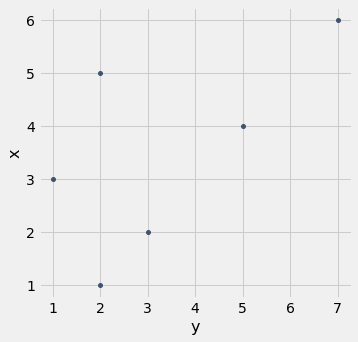

In [129]:
t.scatter('y', 'x')

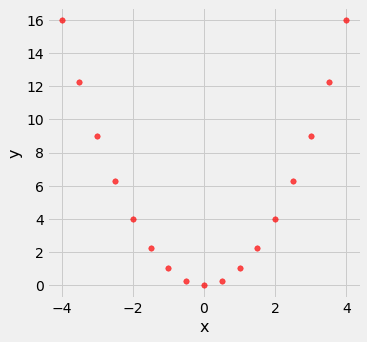

In [130]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [131]:
correlation(nonlinear, 'x', 'y')

0.0

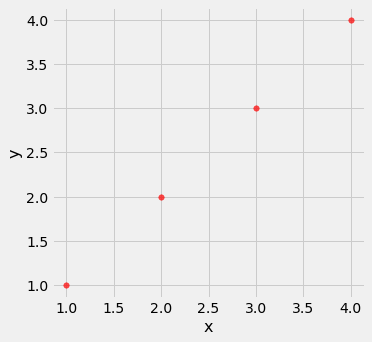

In [132]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [133]:
correlation(line, 'x', 'y')

1.0

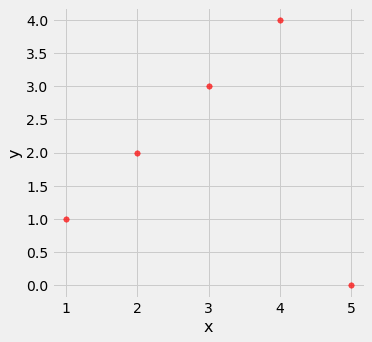

In [134]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [135]:
correlation(outlier, 'x', 'y')

0.0

In [136]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


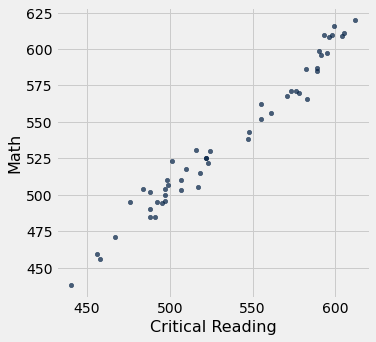

In [137]:
sat2014.scatter('Critical Reading', 'Math')

In [138]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434